In [53]:
import pandas as pd
import os
import matplotlib.pyplot as plt

In [40]:
import kagglehub


path = kagglehub.dataset_download("mashlyn/online-retail-ii-uci")

print("Path to dataset files:", path)

Path to dataset files: /Users/richkaitoo/.cache/kagglehub/datasets/mashlyn/online-retail-ii-uci/versions/3


In [41]:
files = os.listdir(path)
print("Files found:", files)

# Find the CSV file (usually 'online_retail_II.csv')
csv_path = os.path.join(path, files[0]) 

# Load it into a Pandas DataFrame
data = pd.read_csv(csv_path)
print(df.head())

Files found: ['online_retail_II.csv']
  Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

           InvoiceDate  Price  Customer ID         Country  
0  2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2  2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3  2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4  2009-12-01 07:45:00   1.25      13085.0  United Kingdom  


In [42]:

print("Dataset Shape:", data.shape)

Dataset Shape: (1067371, 8)


In [43]:
data.columns

Index(['Invoice', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'Price', 'Customer ID', 'Country'],
      dtype='object')

In [44]:
data.describe()

,Quantity,Price,Customer ID
count,1.067371e+06,1.067371e+06,824364.000000
mean,9.938898e+00,4.649388e+00,15324.638504
std,1.727058e+02,1.235531e+02,1697.464450
min,-8.099500e+04,-5.359436e+04,12346.000000
25%,1.000000e+00,1.250000e+00,13975.000000
50%,3.000000e+00,2.100000e+00,15255.000000
75%,1.000000e+01,4.150000e+00,16797.000000
max,8.099500e+04,3.897000e+04,18287.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 8 columns):
 #   Column       Non-Null Count    Dtype  
---  ------       --------------    -----  
 0   Invoice      1067371 non-null  object 
 1   StockCode    1067371 non-null  object 
 2   Description  1062989 non-null  object 
 3   Quantity     1067371 non-null  int64  
 4   InvoiceDate  1067371 non-null  object 
 5   Price        1067371 non-null  float64
 6   Customer ID  824364 non-null   float64
 7   Country      1067371 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 65.1+ MB


In [46]:
data["InvoiceDate"] = pd.to_datetime(data["InvoiceDate"])
data['TotalPrice'] = data['Quantity'] * data['Price']

In [47]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1067371 entries, 0 to 1067370
Data columns (total 9 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Invoice      1067371 non-null  object        
 1   StockCode    1067371 non-null  object        
 2   Description  1062989 non-null  object        
 3   Quantity     1067371 non-null  int64         
 4   InvoiceDate  1067371 non-null  datetime64[ns]
 5   Price        1067371 non-null  float64       
 6   Customer ID  824364 non-null   float64       
 7   Country      1067371 non-null  object        
 8   TotalPrice   1067371 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 73.3+ MB


In [48]:

data_clean = data[(data['Quantity'] > 0) & (data['Price'] > 0)].copy()

print("Cleaned Dataset Shape:", data_clean.shape)

Cleaned Dataset Shape: (1041671, 9)


In [49]:
data_clean['Description'].isnull().sum()

np.int64(0)

In [52]:
monthly_sales = ( data_clean.set_index('InvoiceDate').resample('ME')['TotalPrice'].sum())

monthly_sales.head()

InvoiceDate
2009-12-31    825685.760
2010-01-31    652708.502
2010-02-28    553713.306
2010-03-31    833570.131
2010-04-30    681528.992
Freq: ME, Name: TotalPrice, dtype: float64

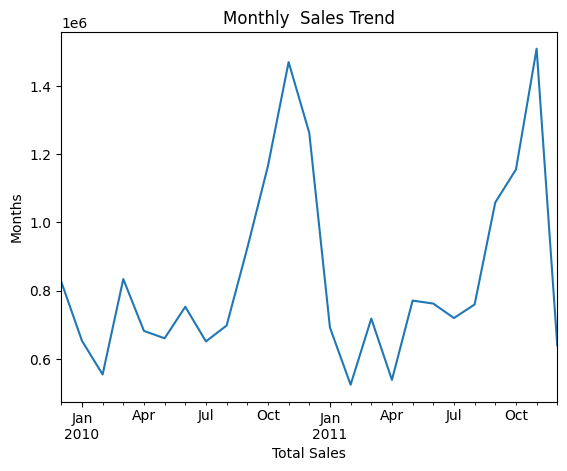

In [66]:
monthly_sales.plot()
plt.title("Monthly  Sales Trend")
plt.ylabel("Months")
plt.xlabel("Total Sales")
plt.show()

In [67]:
country_revenue = ( data_clean.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False).head(10))

country_revenue

Country
United Kingdom    1.787135e+07
EIRE              6.644318e+05
Netherlands       5.542323e+05
Germany           4.312625e+05
France            3.569446e+05
Australia         1.699681e+05
Spain             1.091785e+05
Switzerland       1.010113e+05
Sweden            9.190372e+04
Denmark           6.986219e+04
Name: TotalPrice, dtype: float64

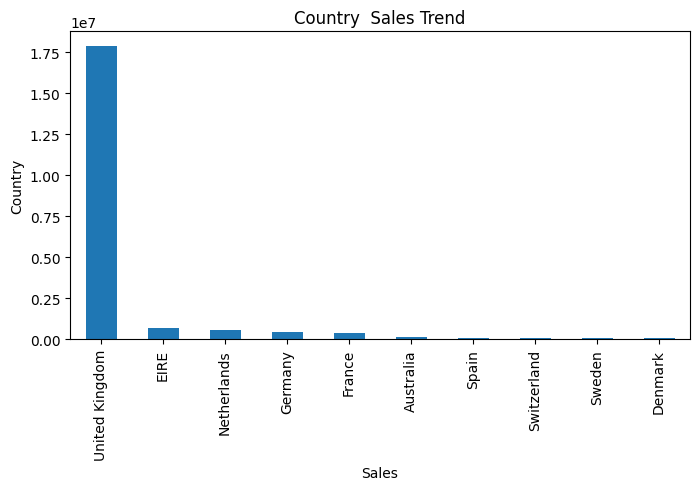

In [65]:
country_revenue.plot(kind = "bar", figsize = (8, 4))
plt.title("Country  Sales Trend")
plt.ylabel("Country")
plt.xlabel("Total Sales")
plt.show()

In [68]:
top_products = (data_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10))

top_products

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     110138
WHITE HANGING HEART T-LIGHT HOLDER     96683
ASSORTED COLOUR BIRD ORNAMENT          81809
PAPER CRAFT , LITTLE BIRDIE            80995
JUMBO BAG RED RETROSPOT                79279
MEDIUM CERAMIC TOP STORAGE JAR         78033
BROCADE RING PURSE                     71430
PACK OF 60 PINK PAISLEY CAKE CASES     56794
60 TEATIME FAIRY CAKE CASES            54716
SMALL POPCORN HOLDER                   49948
Name: Quantity, dtype: int64

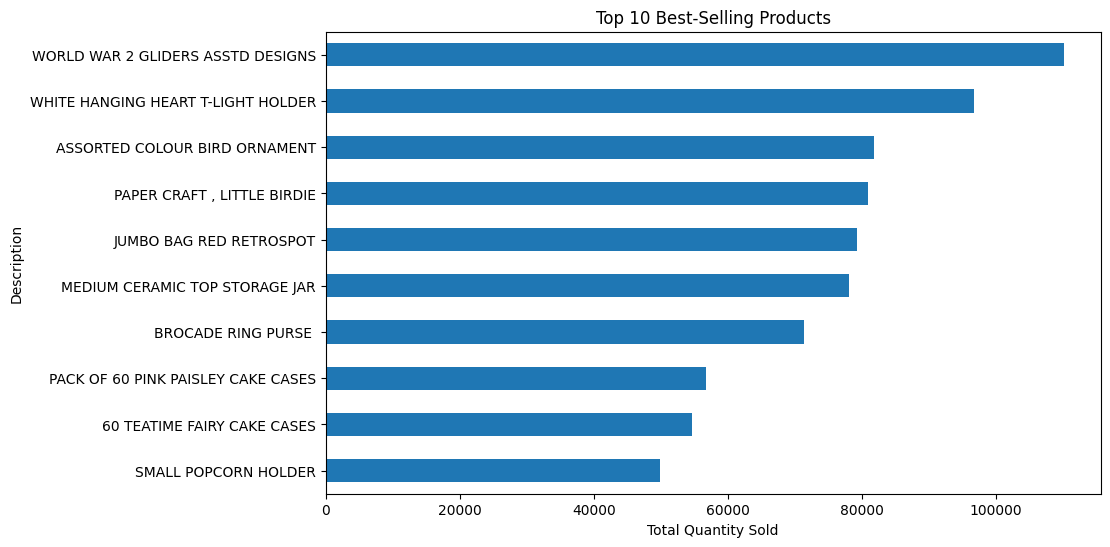

In [71]:
top_products.plot(kind='barh', figsize=(10,6))
plt.title('Top 10 Best-Selling Products')
plt.xlabel('Total Quantity Sold')
plt.gca().invert_yaxis()
plt.show()

In [72]:
customer_spending = (data_clean.dropna(subset=['Customer ID']).groupby('Customer ID')['TotalPrice'].sum())

customer_spending.describe()


count      5878.000000
mean       3018.616737
std       14737.731040
min           2.950000
25%         348.762500
50%         898.915000
75%        2307.090000
max      608821.650000
Name: TotalPrice, dtype: float64

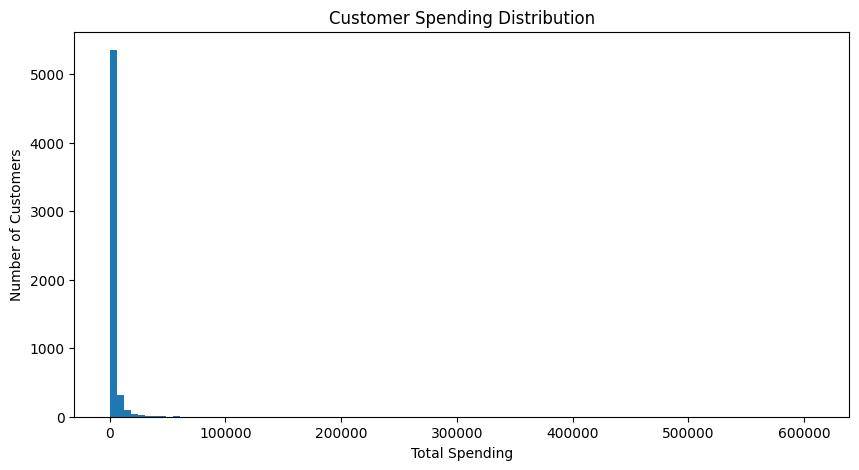

In [73]:
plt.figure(figsize=(10,5))
plt.hist(customer_spending, bins=100)
plt.title('Customer Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Number of Customers')
plt.show()

In [75]:
 #Customer Segmentation using RFM Analysis & Clustering

In [76]:
reference_date = data_clean['InvoiceDate'].max() + pd.Timedelta(days=1)
reference_date

Timestamp('2011-12-10 12:50:00')

In [77]:
rfm = (
    data_clean
    .dropna(subset=['Customer ID'])
    .groupby('Customer ID')
    .agg({
        'InvoiceDate': lambda x: (reference_date - x.max()).days,   # Recency
        'Invoice': 'nunique',                                       # Frequency
        'TotalPrice': 'sum'                                         # Monetary
    })
)

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm.head()


,Recency,Frequency,Monetary
Customer ID,,,
12346.0,326,12,77556.46
12347.0,2,8,5633.32
12348.0,75,5,2019.40
12349.0,19,4,4428.69
12350.0,310,1,334.40


In [78]:
rfm.describe()

,Recency,Frequency,Monetary
count,5878.000000,5878.000000,5878.000000
mean,201.331916,6.289384,3018.616737
std,209.338707,13.009406,14737.731040
min,1.000000,1.000000,2.950000
25%,26.000000,1.000000,348.762500
50%,96.000000,3.000000,898.915000
75%,380.000000,7.000000,2307.090000
max,739.000000,398.000000,608821.650000


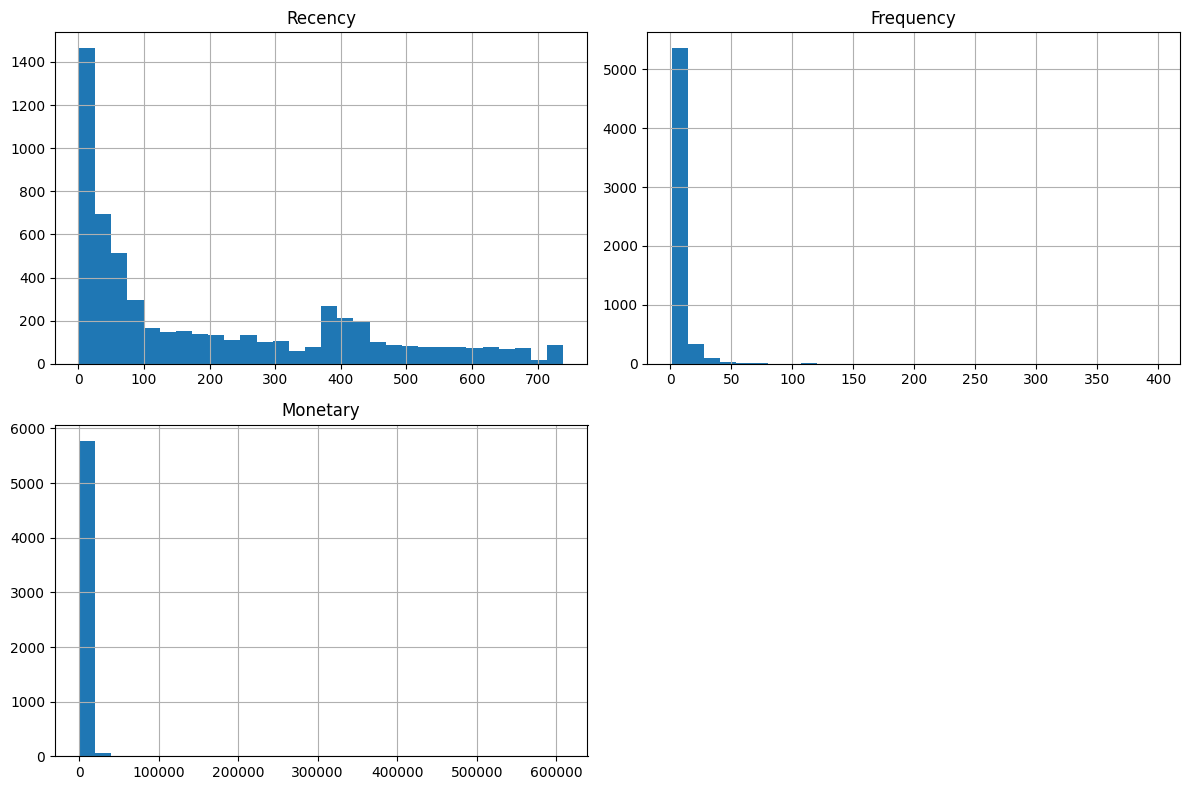

In [79]:
import matplotlib.pyplot as plt

rfm.hist(bins=30, figsize=(12,8))
plt.tight_layout()
plt.show()

In [80]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

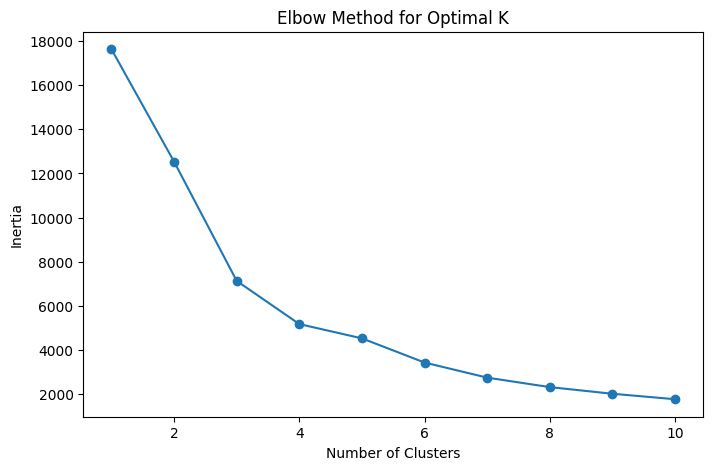

In [81]:
from sklearn.cluster import KMeans

inertia = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8,5))
plt.plot(range(1,11), inertia, marker='o')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [82]:
kmeans = KMeans(n_clusters=4, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

rfm.head()

,Recency,Frequency,Monetary,Cluster
Customer ID,,,,
12346.0,326,12,77556.46,1
12347.0,2,8,5633.32,1
12348.0,75,5,2019.40,1
12349.0,19,4,4428.69,1
12350.0,310,1,334.40,0


In [83]:
cluster_profile = rfm.groupby('Cluster').mean()
cluster_profile

,Recency,Frequency,Monetary
Cluster,,,
0,463.032032,2.212212,765.244446
1,67.005728,7.307732,3009.402451
2,25.942857,103.714286,83086.079771
3,3.500000,212.500000,436835.792500


In [84]:
churn_threshold = 90

rfm['Churn'] = (rfm['Recency'] > churn_threshold).astype(int)

rfm['Churn'].value_counts()

Churn
1    2989
0    2889
Name: count, dtype: int64

In [85]:
X = rfm[['Recency', 'Frequency', 'Monetary', 'Cluster']]
y = rfm['Churn']

In [87]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [88]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [90]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier

lr = LogisticRegression(max_iter=1000)


rf_model = RandomForestClassifier(
    n_estimators=200,
    random_state=42,
    class_weight='balanced')


lr.fit(X_train_scaled, y_train)

y_pred_lr = lr.predict(X_test_scaled)

rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

In [91]:
from sklearn.metrics import classification_report, roc_auc_score

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))
print("ROC AUC:", roc_auc_score(y_test, lr.predict_proba(X_test_scaled)[:,1]))

print("\n=========================================================")

print("\nRandom Forest Report:")
print(classification_report(y_test, y_pred_rf))
print("ROC AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:,1]))

Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       578
           1       1.00      0.98      0.99       598

    accuracy                           0.99      1176
   macro avg       0.99      0.99      0.99      1176
weighted avg       0.99      0.99      0.99      1176

ROC AUC: 1.0


Random Forest Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       578
           1       1.00      1.00      1.00       598

    accuracy                           1.00      1176
   macro avg       1.00      1.00      1.00      1176
weighted avg       1.00      1.00      1.00      1176

ROC AUC: 1.0


In [92]:
feature_importance = pd.Series(
    rf_model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

feature_importance

Recency      0.803539
Cluster      0.165262
Frequency    0.029107
Monetary     0.002092
dtype: float64

#### Churn Prediction Insights
Recency is the most important feature in predicting customer churn, indicating that recent inactivity is a strong churn signal.
Monetary value and purchase frequency also play significant roles in distinguishing active from churned customers.
The Random Forest model outperforms Logistic Regression, demonstrating its ability to capture non-linear relationships in customer behavior.

In [94]:
sales_ts = (
    data_clean
    .set_index('InvoiceDate')
    .resample('ME')['TotalPrice']
    .sum()
)

sales_ts.head()

InvoiceDate
2009-12-31    825685.760
2010-01-31    652708.502
2010-02-28    553713.306
2010-03-31    833570.131
2010-04-30    681528.992
Freq: ME, Name: TotalPrice, dtype: float64

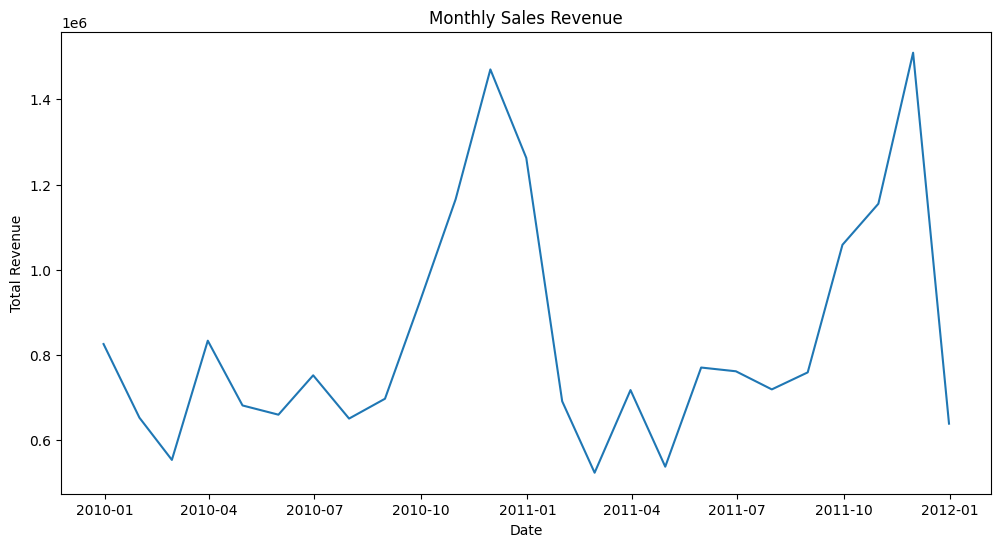

In [95]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(sales_ts)
plt.title('Monthly Sales Revenue')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

In [96]:
train = sales_ts.iloc[:-3]
test = sales_ts.iloc[-3:]

print("Train period:", train.index.min(), "to", train.index.max())
print("Test period:", test.index.min(), "to", test.index.max())


Train period: 2009-12-31 00:00:00 to 2011-09-30 00:00:00
Test period: 2011-10-31 00:00:00 to 2011-12-31 00:00:00


In [100]:
from statsmodels.tsa.arima.model import ARIMA

arima_model = ARIMA(train, order=(1,1,1))
arima_fit = arima_model.fit()

arima_forecast = arima_fit.forecast(steps=3)
arima_forecast


2011-10-31    1.005916e+06
2011-11-30    9.698127e+05
2011-12-31    9.450679e+05
Freq: ME, Name: predicted_mean, dtype: float64

In [101]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(test, arima_forecast)
rmse = np.sqrt(mean_squared_error(test, arima_forecast))

print("ARIMA MAE:", mae)
print("ARIMA RMSE:", rmse)


ARIMA MAE: 331668.1912065318
ARIMA RMSE: 368452.5796619529


In [105]:
from prophet import Prophet

prophet_df = sales_ts.reset_index()
prophet_df.columns = ['ds', 'y']

prophet_model = Prophet()
prophet_model.fit(prophet_df)

future = prophet_model.make_future_dataframe(periods=6, freq='ME')
forecast = prophet_model.predict(future)

forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

18:39:51 - cmdstanpy - INFO - Chain [1] start processing
18:39:51 - cmdstanpy - INFO - Chain [1] done processing


,ds,yhat,yhat_lower,yhat_upper
26,2012-02-29,427464.955113,315962.982613,5.564964e+05
27,2012-03-31,906573.669830,783456.307157,1.022879e+06
28,2012-04-30,886906.278483,777409.567941,9.990931e+05
29,2012-05-31,453769.618995,345195.051572,5.705499e+05
30,2012-06-30,828533.794461,713251.792783,9.385395e+05


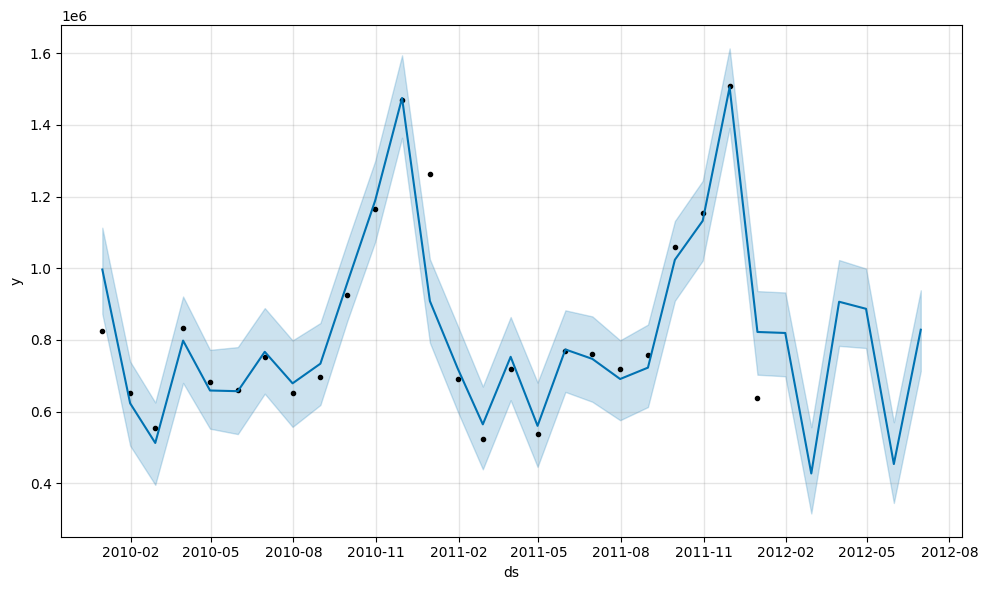

In [107]:

prophet_model.plot(forecast)
plt.show()

#### Forecasting Insights¶
Time series models successfully captured overall trends and seasonality in monthly sales data.
Prophet provides robust forecasts with uncertainty intervals, making it suitable for business decision-making.
Sales forecasting results can be directly integrated into the deployed web application for real-time insights.

In [109]:
import joblib

joblib.dump(rf_model, 'rf_churn_model.pkl')
joblib.dump(scaler, 'scaler.pkl')
forecast.to_csv('sales_forecast.csv', index=False)
rfm.to_csv('rfm_data.csv')